In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import struct
import h5py
import numpy as np
import matplotlib.pyplot as plt
import pickle
import subprocess
#import bluepyopt as bpop

def nrnMread(fileName):
    f = open(fileName, "rb")
    nparam = struct.unpack('i', f.read(4))[0]
    typeFlg = struct.unpack('i', f.read(4))[0]
    return np.fromfile(f,np.double)

data_dir ='../Data'
vs_fn = '../Data/VHotP'
target_volts = np.genfromtxt("../Data/target_volts_BBP19.csv",delimiter = ',')
ntimestep = 10000


def nrnMreadH5(fileName):
    f = h5py.File(fileName,'r')
    dat = f['Data'][:][0]
    return np.array(dat)

In [2]:
def getVolts(idx):
    '''Helper function that gets volts from data and shapes them for a given stim index'''
    fn = vs_fn + str(idx) +  '.h5'    #'.h5' 
    curr_volts =  nrnMreadH5(fn)
    #fn = vs_fn + str(idx) +  '.dat'    #'.h5'
    #curr_volts =  nrnMread(fn)
    Nt = int(len(curr_volts)/ntimestep)
    shaped_volts = np.reshape(curr_volts, [Nt,ntimestep])
    return shaped_volts

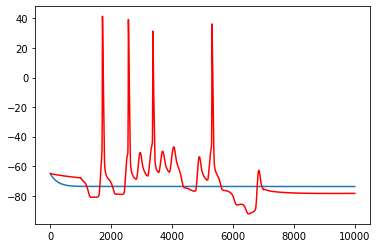

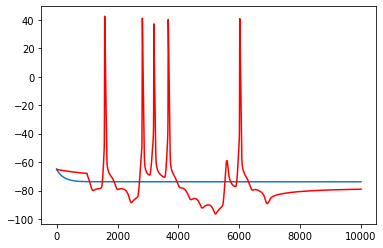

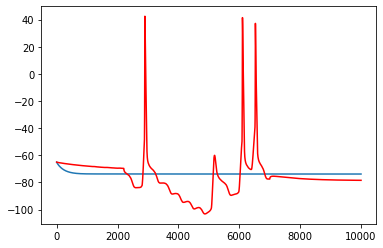

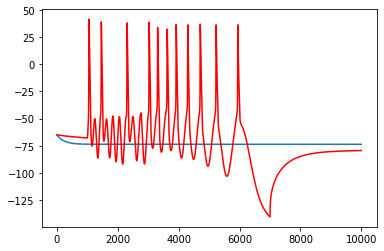

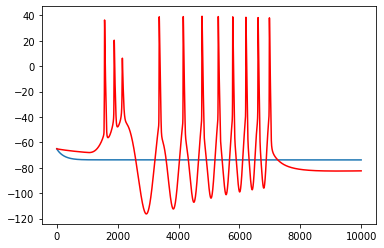

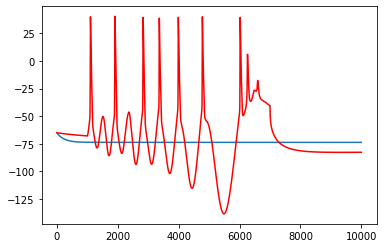

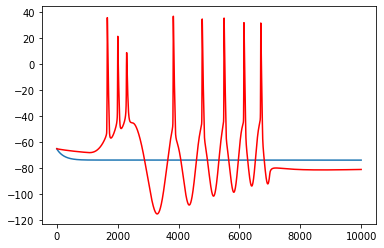

In [4]:
nstims = 8 # just looking at first 8 stims

for i in range(1,nstims):
    plt.figure()
    curr_volts = getVolts(i)
    plt.plot(curr_volts[3])
    plt.plot(target_volts[i,:], color='Red')